<a href="https://colab.research.google.com/github/ArjunBhan/Data-Science-Capping/blob/main/Copy_of_AML_HW1_Solutions_UNI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures.

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [971]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [972]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from google.colab import files


## Part 1: Data Visualization and Analysis

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is bike_rental.csv.


In [973]:
# Load the dataset
bike_rental_df = pd.read_csv('bike_rental.csv')
bike_rental_df

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,December,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,December,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,December,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,December,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<b> 1.1 Create a bar chart to compare the average bike rental count on holiday and non-holiday weekdays. Are there differences in rental patterns? </b>

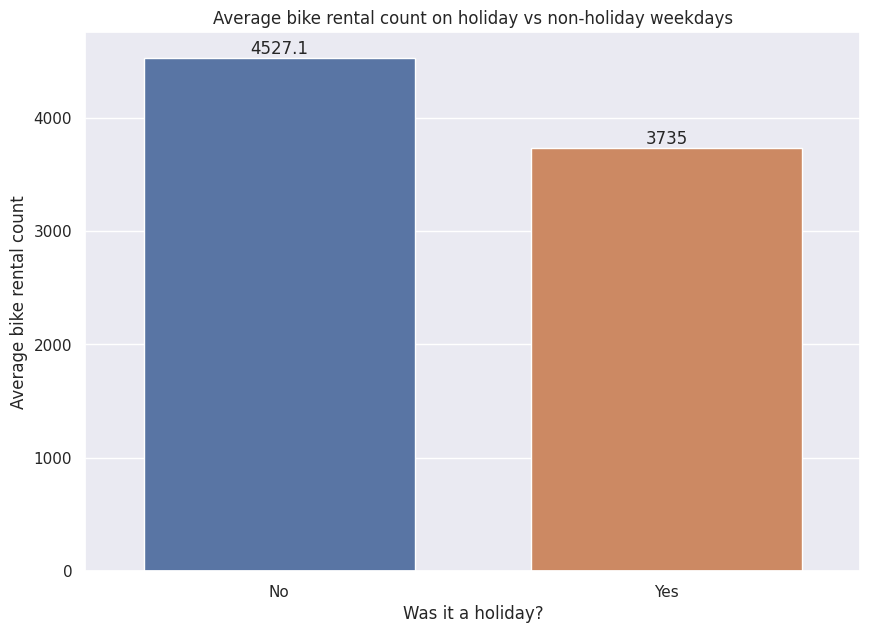

In [974]:
### Code here
plt.figure(figsize=(10,7))
noLabPlot = sns.barplot(x= avgHoli.index, y= avgHoli['count'],width = .7)
plt.xlabel("Was it a holiday?")
plt.ylabel("Average bike rental count")
plt.title("Average bike rental count on holiday vs non-holiday weekdays")
plt.bar_label(noLabPlot.containers[0])
plt.show()

In [975]:
### Comment here
# There is a difference in the average bike rental cost on holidays non-holiday weekends. Holiday rental are more expensive than non-holiday ones.


<b> 1.2 Plot a small multiple of bar charts to understand data distribution of
the following categorical variables. </b>
1. month
2. season
3. working_day
4. weather
<b></b>

In [976]:
bike_rental_month_red= bike_rental_df
bike_rental_month_red['month'] = bike_rental_month_red['month'].str.slice(0,3)
bike_rental_month_red

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count
0,Jan,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,Jan,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,Jan,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,Jan,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,Jan,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Dec,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,Dec,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,Dec,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,Dec,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<Axes: xlabel='weather', ylabel='Count'>

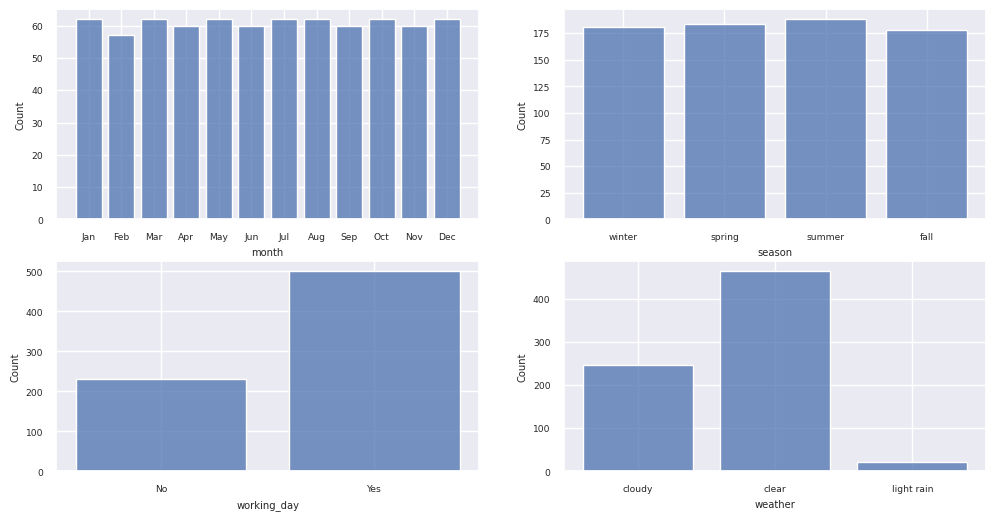

In [977]:
### Code here
sns.set(rc={'figure.figsize':(12,6)})
sns.set_context("notebook",font_scale= .6)
fig, axes = plt.subplots(2, 2)
sns.histplot(bike_rental_month_red, x="month",stat = 'count', ax = axes[0, 0], shrink=.8,)
sns.histplot(bike_rental_month_red, x="season",stat = 'count', ax = axes[0, 1], shrink=.8)
sns.histplot(bike_rental_month_red, x="working_day",stat = 'count',ax = axes[1, 0], shrink=.8)
sns.histplot(bike_rental_month_red, x="weather",stat = 'count',ax = axes[1, 1], shrink=.8)


<b> 1.3 Compare the number of registered and casual bike rentals over time by month. Create a stacked bar chart to show the contributions of each user type. </b>

In [978]:
monSumGroup= bike_rental_df.groupby('month').sum()
monSumGroup

<ipython-input-978-1e56780dcbe0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monSumGroup= bike_rental_df.groupby('month').sum()


,temp,feels_temp,humidity,windspeed,casual,registered,count
month,,,,,,,
Apr,28.199930,27.424854,35.283787,14.068934,60802,208292,269094
Aug,43.932057,40.391438,39.539266,10.720925,72039,279155,351194
Dec,20.089920,20.221902,41.294512,10.949753,21693,189343,211036
Feb,17.055907,17.084682,32.345487,12.293984,14963,136389,151352
Jan,14.659523,14.867346,36.321353,12.790772,12042,122891,134933
Jul,46.839166,43.653819,37.068332,10.295647,78157,266791,344948
Jun,41.045832,38.294743,34.548331,11.125194,73906,272436,346342
Mar,24.213403,23.681129,36.485452,13.807365,44444,184476,228920
May,36.877502,35.071044,42.715415,11.345313,75285,256401,331686


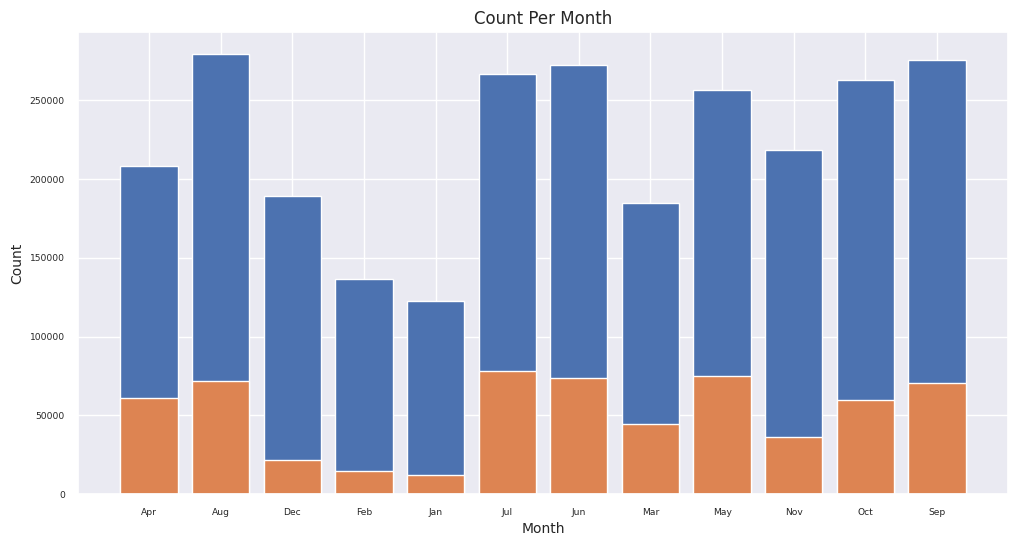

In [979]:
plt.bar(monSumGroup.index,monSumGroup['registered'] )
plt.bar(monSumGroup.index,monSumGroup['casual'] )
plt.xlabel("Month", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.title("Count Per Month", fontsize = 12)
plt.show()

<b> 1.4 Plot relationships between the following features and the target variable count as a small multiple of scatter plots. </b>

1. temp:
2. feels_temp
3. humidity
4. windspeed
<b></b>

<Axes: xlabel='count', ylabel='windspeed'>

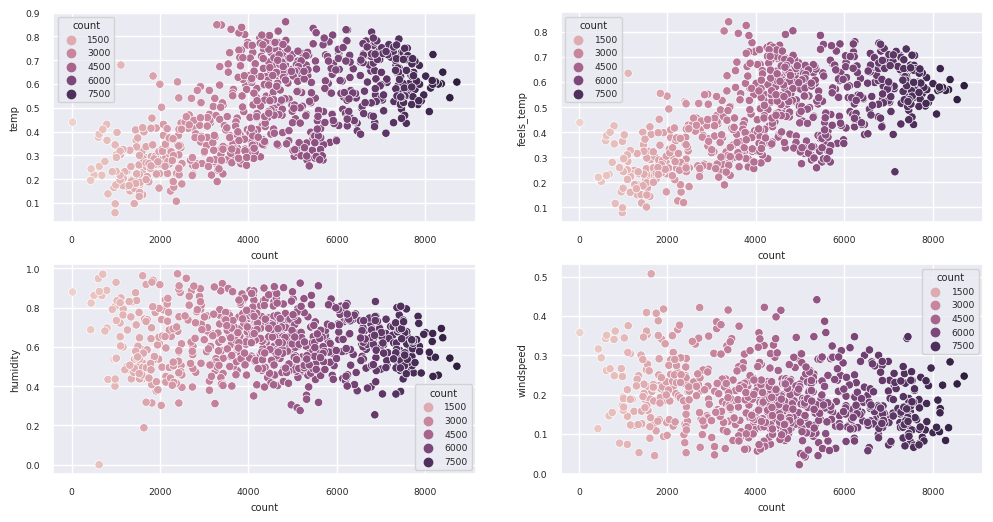

In [980]:
### Code here
### Code here
sns.set(rc={'figure.figsize':(12,6)})
sns.set_context("notebook",font_scale= .6)
fig, axes = plt.subplots(2, 2)
sns.scatterplot(bike_rental_df, x='count', y = 'temp', hue = 'count', ax = axes[0, 0])
sns.scatterplot(bike_rental_df, x='count', y = 'feels_temp',hue = 'count', ax = axes[0, 1])
sns.scatterplot(bike_rental_df, x='count', y = 'humidity', hue = 'count', ax = axes[1, 0])
sns.scatterplot(bike_rental_df, x = 'count', y='windspeed',hue = 'count', ax = axes[1, 1])



## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression


The objective of this dataset is to predict the count of bike rentals based on weather and time. We will use linear regression to predict the count using weather and time.

In [981]:
# split data into features and labels

bike_rental_X = bike_rental_df.drop(columns=['count'])
bike_rental_y = bike_rental_df['count']

**2.1.1 Plot the relationships between the label (count) and the continuous features (temp, feels_temp, humidity, windspeed, casual, registered) using a small multiple of scatter plots. Make sure to label the axes.**

<Axes: xlabel='count', ylabel='registered'>

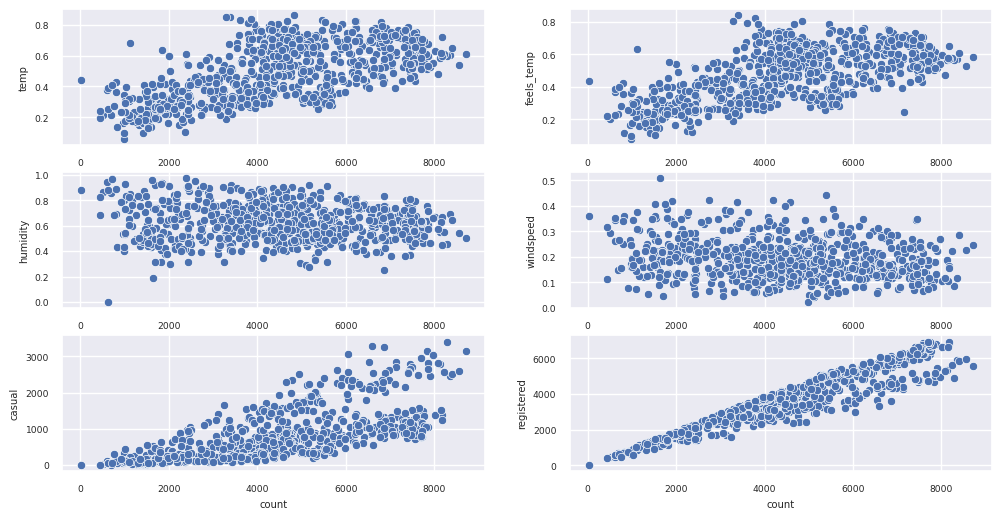

In [982]:
### Code here
sns.set(rc={'figure.figsize':(12,6)})
sns.set_context("notebook",font_scale= .6)
fig, axes = plt.subplots(3, 2)
sns.scatterplot(x=bike_rental_y, y = bike_rental_X['temp'], ax = axes[0, 0])
sns.scatterplot(x=bike_rental_y, y = bike_rental_X['feels_temp'], ax = axes[0, 1])
sns.scatterplot(x=bike_rental_y, y = bike_rental_X['humidity'],  ax = axes[1, 0])
sns.scatterplot(x = bike_rental_y, y = bike_rental_X['windspeed'], ax = axes[1, 1])
sns.scatterplot(x=bike_rental_y, y = bike_rental_X['casual'],  ax = axes[2, 0])
sns.scatterplot(x = bike_rental_y, y = bike_rental_X['registered'], ax = axes[2, 1])


**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [983]:
### Comment here
# Linear regression seems to be a good model for this data. The register, vasual, temp and feel temp seem to have a strong correlation with the target value
# and a linear model would be able to find the trend of the data. Humidity and windspeed dont seem to be highly correlated with the target data and it might be
# hard for the model find a trend with these values and the target.

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


**2.1.3 Encode the categorical variables of the Bike Rental dataset.**

In [984]:
### Code here
bike_rental_X_encode = pd.get_dummies(bike_rental_X,columns = ['month',	'season',	'holiday',	'weekday', 'working_day', 'weather'],drop_first = True)

In [985]:
### Code here
bike_rental_X_encode

,temp,feels_temp,humidity,windspeed,casual,registered,month_Aug,month_Dec,month_Feb,month_Jan,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,working_day_Yes,weather_cloudy,weather_light rain
0,0.344167,0.363625,0.805833,0.160446,331,654,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0.363478,0.353739,0.696087,0.248539,131,670,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0.196364,0.189405,0.437273,0.248309,120,1229,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.212122,0.590435,0.160296,108,1454,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,0.226957,0.229270,0.436957,0.186900,82,1518,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,247,1867,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
727,0.253333,0.255046,0.590000,0.155471,644,2451,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
728,0.253333,0.242400,0.752917,0.124383,159,1182,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
729,0.255833,0.231700,0.483333,0.350754,364,1432,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

<Axes: >

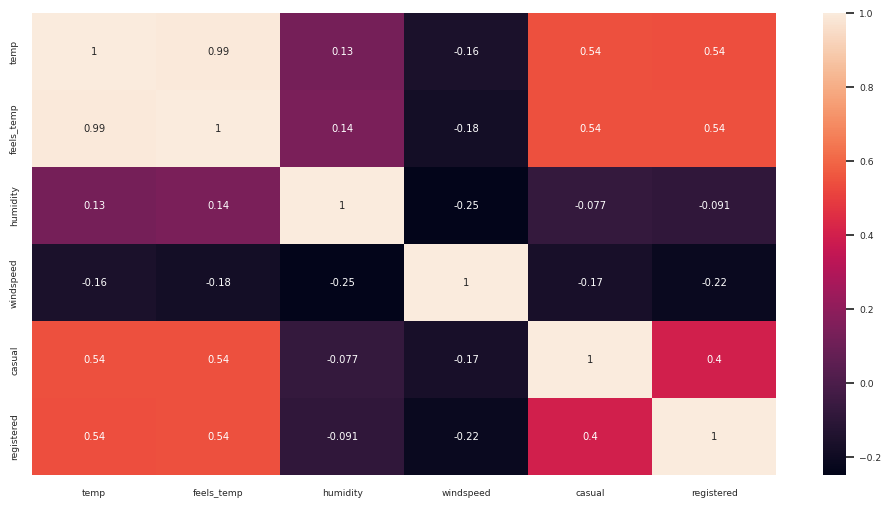

In [986]:
### Code here
sns.heatmap(bike_rental_X_encode[['temp'	,'feels_temp'	,'humidity',	'windspeed'	,'casual','registered']].corr(), annot=True)

In [987]:
### Code here
bike_rental_X_encode = bike_rental_X_encode.drop('feels_temp', axis = 1)
bike_rental_X_encode = bike_rental_X_encode.drop('registered', axis = 1)
bike_rental_X_encode = bike_rental_X_encode.drop('casual', axis = 1)


In [988]:
### Comment here
bike_rental_X_encode.columns

Index(['temp', 'humidity', 'windspeed', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'season_spring', 'season_summer',
       'season_winter', 'holiday_Yes', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'working_day_Yes', 'weather_cloudy',
       'weather_light rain'],
      dtype='object')

**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [989]:
### Code here
bike_rental_X_train, x, bike_rental_y_train, y= train_test_split(bike_rental_X_encode,bike_rental_y,test_size = .4, train_size =.6, random_state = 42 )
bike_rental_X_val, bike_rental_X_test, bike_rental_y_val, bike_rental_y_test= train_test_split(x,y,test_size = .5, random_state = 42 )


In [990]:
bike_rental_X_val

,temp,humidity,windspeed,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,working_day_Yes,weather_cloudy,weather_light rain
164,0.604167,0.507083,0.269283,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
448,0.502500,0.885417,0.192783,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
404,0.265000,0.562083,0.194037,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
70,0.329167,0.594583,0.220775,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
464,0.489167,0.317500,0.358196,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0.374167,0.685000,0.082725,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
49,0.399167,0.187917,0.507463,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
360,0.325000,0.762500,0.188450,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
324,0.447500,0.910000,0.138054,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


**2.1.6 Standardize the columns in the feature matrices.**

---



In [991]:
### Code here
Scaler = StandardScaler()
bike_rental_X_train= Scaler.fit_transform(bike_rental_X_train)
bike_rental_X_val = Scaler.fit_transform(bike_rental_X_val)
bike_rental_X_test = Scaler.fit_transform(bike_rental_X_test)

In [992]:
#Adding a column of ones to the feature matrices for the bias term.

bike_rental_X_train = np.hstack([np.ones((bike_rental_X_train.shape[0], 1)), bike_rental_X_train])
bike_rental_X_val = np.hstack([np.ones((bike_rental_X_val.shape[0], 1)), bike_rental_X_val])
bike_rental_X_test = np.hstack([np.ones((bike_rental_X_test.shape[0], 1)), bike_rental_X_test])


In [993]:
bike_rental_X_train

array([[ 1.        , -0.71738357,  0.31850137, ..., -1.38564065,
        -0.72901888, -0.16050272],
       [ 1.        ,  0.64208628, -2.02984515, ...,  0.72168784,
        -0.72901888, -0.16050272],
       [ 1.        , -0.49931006, -0.24617737, ...,  0.72168784,
        -0.72901888, -0.16050272],
       ...,
       [ 1.        ,  0.72560309,  1.51657399, ...,  0.72168784,
         1.37170658, -0.16050272],
       [ 1.        , -0.79585596, -1.14937654, ..., -1.38564065,
        -0.72901888, -0.16050272],
       [ 1.        , -0.51322952,  1.30444838, ...,  0.72168784,
         1.37170658, -0.16050272]])

At the end of this pre-processing, you should have the following vectors and matrices:
- Bike Rental Prediction dataset: bike_rental_X_train, bike_rental_X_val, bike_rental_X_test, bike_rental_y_train, bike_rental_y_val, bike_rental_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.7 Implement a `LinearRegression` class with two methods: `train` and

---

`predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [994]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        w= np.asmatrix(X)
        print(w)

        '''Trains model using ridge regression closed-form solution
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        None
        '''
        ### Your code here
        x= np.array(X)
        y= np.array(y)
        fistPart = np.dot(x.T, x)
        identity = np.identity(x.shape[1])
        fistPart = fistPart + self.alpha * identity
        secondPart = np.dot(x.T,y)
        self.w = np.linalg.solve(fistPart,secondPart)

        return None

    def predict(self, X):
        '''Predicts on X using trained model.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        return np.dot(X,self.w)



In [995]:
x.shape[1]

27

### Train, Evaluate, and Interpret LR Model

**2.1.8 Train a linear regression model ($\alpha = 0$) on the bike rental training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [996]:
def get_report(y_pred, y_test):
    """
    function to Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns a dataframe with 6 rows.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual':actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [997]:
bike_rental_X_train.shape

(438, 28)

In [998]:
### Code here
linReg= LinearRegression()
xVal = linReg.train(bike_rental_X_train,bike_rental_y_train)
yPredTrain=linReg.predict(bike_rental_X_train)
yPredVal=linReg.predict(bike_rental_X_val)
yPredTest=linReg.predict(bike_rental_X_test)

values_train = get_report(yPredTrain,bike_rental_y_train)
values_val = get_report(yPredVal,bike_rental_y_val)
values_test = get_report(yPredTest,bike_rental_y_test)

print("\n           Train")
print(values_train)
print("\n           Validation")
print(values_val)
print("\n           Test")
print(values_test)

[[ 1.         -0.71738357  0.31850137 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.          0.64208628 -2.02984515 ...  0.72168784 -0.72901888
  -0.16050272]
 [ 1.         -0.49931006 -0.24617737 ...  0.72168784 -0.72901888
  -0.16050272]
 ...
 [ 1.          0.72560309  1.51657399 ...  0.72168784  1.37170658
  -0.16050272]
 [ 1.         -0.79585596 -1.14937654 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.         -0.51322952  1.30444838 ...  0.72168784  1.37170658
  -0.16050272]]

           Train
           Prediction  Actual
Position                     
1         4791.576092    3068
2         5694.176994    5312
3         3852.246919    2744
436       5909.173409    3907
437       3706.111336    4911
438       3114.119290    2162

           Validation
           Prediction  Actual
Position                     
1         5189.630197    4891
2         4701.305467    3372
3         2910.683158    3830
144       2343.539382    1162
145       2945.793070    2765
146       5649.51

**2.1.9 As a baseline model, use the mean of the training labels (bike_rental_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

> Indented block



>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [999]:
### Code here
print(r2_score(bike_rental_y_train,yPredTrain))
print(r2_score(bike_rental_y_val,yPredVal))
print(r2_score(bike_rental_y_test,yPredTest))


0.5990465820158949
0.5161644774323642
0.5306072943948335


**2.1.10 Interpret your model trained on the bike rental dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [1000]:
linReg.w

array([4587.55479452, 1269.18363771, -387.36415521, -229.93882928,
       -270.02694162,   28.93612821,   59.96667521,   68.05947637,
       -343.90896722, -210.83343976,  139.10112645,   36.78146932,
       -106.47105996,   27.73229074,   96.58495402, -286.25666994,
       -210.75680679, -680.54069992, -117.00626177,  -27.82160533,
         23.88190339, -132.2418371 ,  -79.0272438 ,  -64.48392868,
        -74.68364733,  -27.9343727 , -185.81045293, -250.00157736])

In [1001]:
bike_rental_X_train

array([[ 1.        , -0.71738357,  0.31850137, ..., -1.38564065,
        -0.72901888, -0.16050272],
       [ 1.        ,  0.64208628, -2.02984515, ...,  0.72168784,
        -0.72901888, -0.16050272],
       [ 1.        , -0.49931006, -0.24617737, ...,  0.72168784,
        -0.72901888, -0.16050272],
       ...,
       [ 1.        ,  0.72560309,  1.51657399, ...,  0.72168784,
         1.37170658, -0.16050272],
       [ 1.        , -0.79585596, -1.14937654, ..., -1.38564065,
        -0.72901888, -0.16050272],
       [ 1.        , -0.51322952,  1.30444838, ...,  0.72168784,
         1.37170658, -0.16050272]])

In [1002]:
np.append("Bias",bike_rental_X_encode.columns)

array(['Bias', 'temp', 'humidity', 'windspeed', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'season_spring', 'season_summer', 'season_winter', 'holiday_Yes',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'working_day_Yes', 'weather_cloudy', 'weather_light rain'],
      dtype=object)

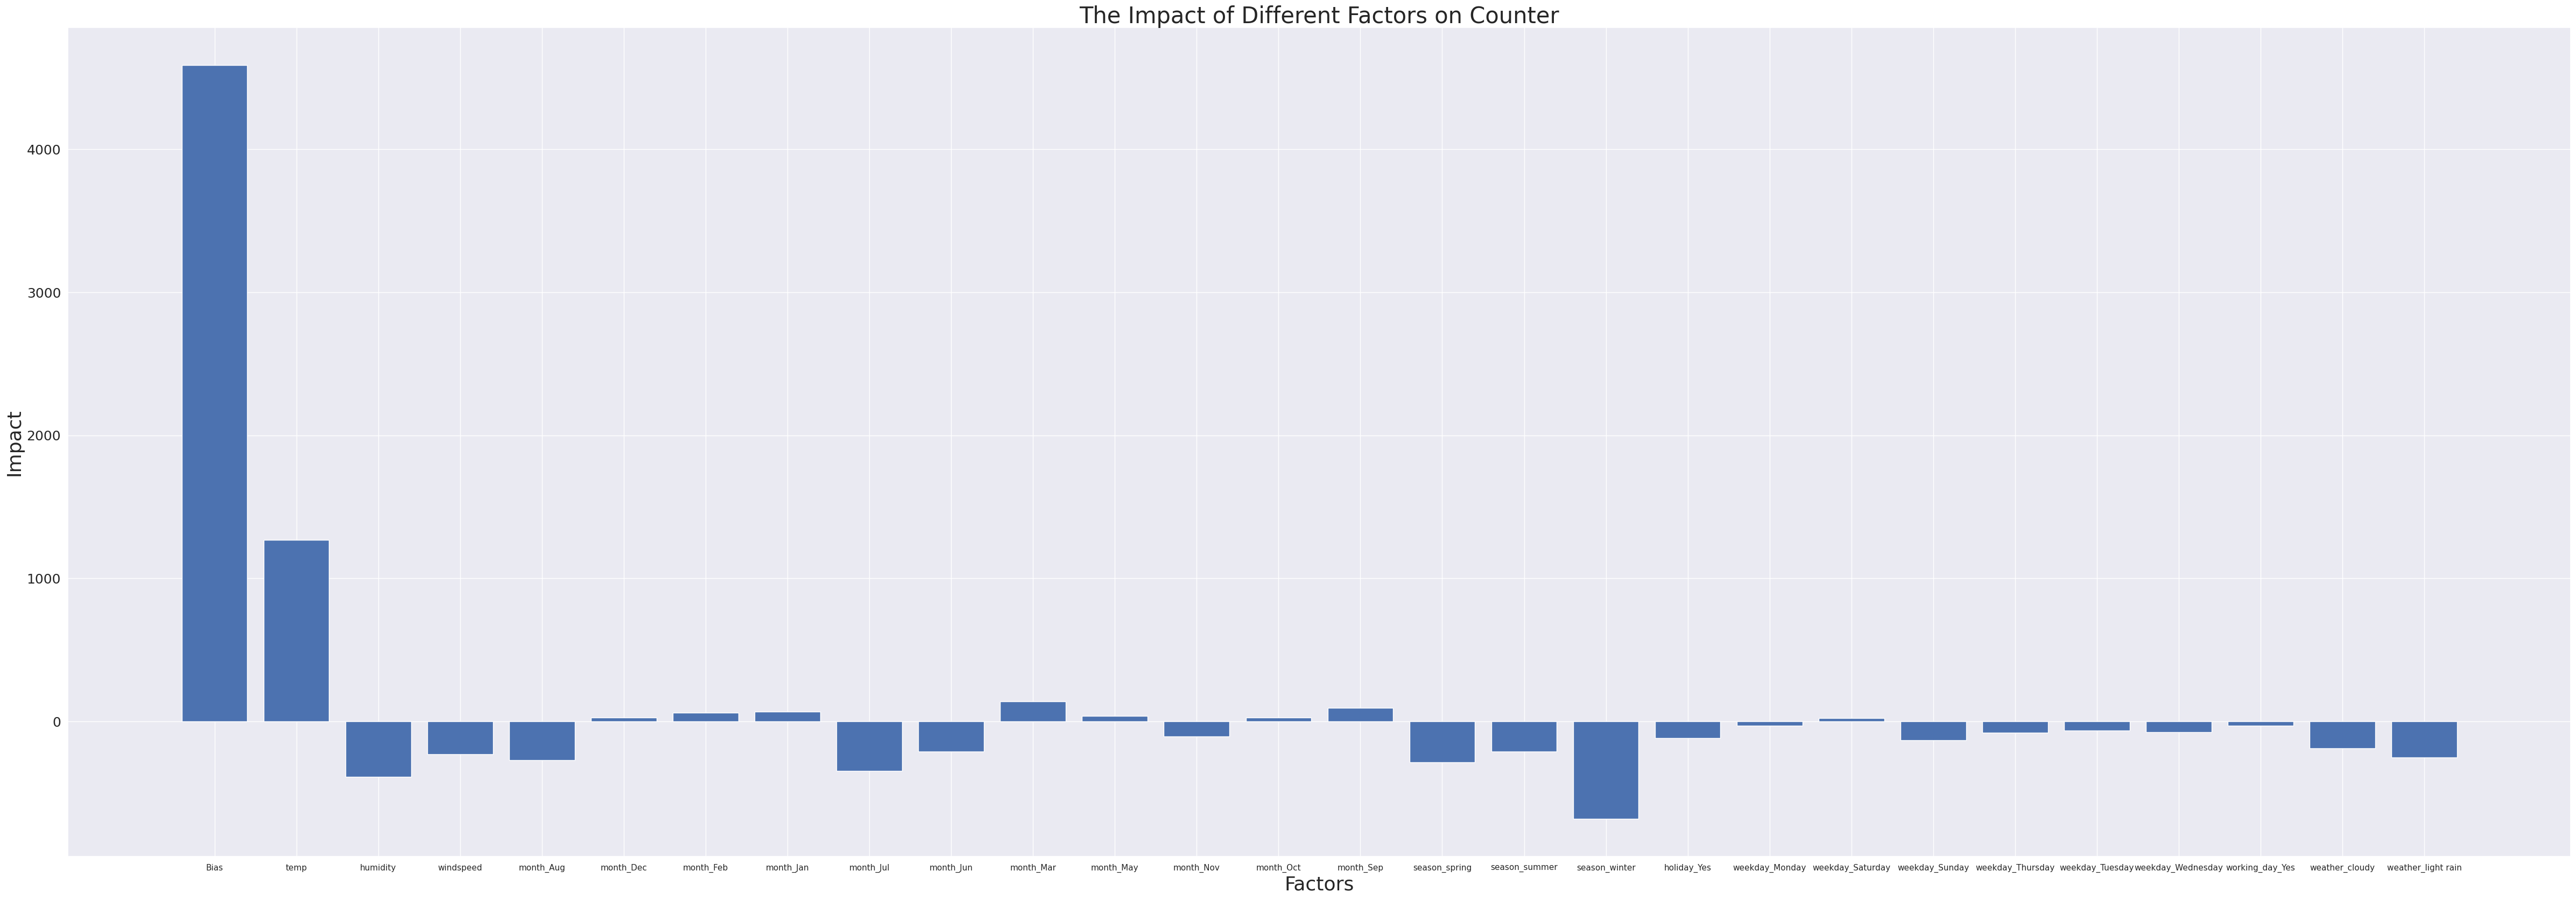

In [1003]:
### Code here
sns.set(rc={'figure.figsize':(60,20)})
labels = np.append("Bias",bike_rental_X_encode.columns)
plt.xlabel("Factors", fontsize = 26)
plt.ylabel("Impact", fontsize = 26)
plt.yticks(fontsize = 18)
plt.title("The Impact of Different Factors on Counter", fontsize = 30)
plt.bar(labels,linReg.w)
plt.show()


**2.1.11 According to your model, which features are the greatest contributors to the car price?**

In [1004]:
### Comment here
#Acorrding to the graph besides bias the temp feature is the the greatest contributors to the car price.

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the bike rental dataset.

**2.1.12 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

In [1005]:
### Code here
linReg= LinearRegression()
xVal = linReg.train(bike_rental_X_train,bike_rental_y_train)
yPredTrain=linReg.predict(bike_rental_X_train)
yPredVal=linReg.predict(bike_rental_X_val)
yPredTest=linReg.predict(bike_rental_X_test)

values_train = get_report(yPredTrain,bike_rental_y_train)
values_val = get_report(yPredVal,bike_rental_y_val)
values_test = get_report(yPredTest,bike_rental_y_test)

print("\n           Train")
print(values_train)
print("\n           Validation")
print(values_val)
print("\n           Test")
print(values_test)

[[ 1.         -0.71738357  0.31850137 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.          0.64208628 -2.02984515 ...  0.72168784 -0.72901888
  -0.16050272]
 [ 1.         -0.49931006 -0.24617737 ...  0.72168784 -0.72901888
  -0.16050272]
 ...
 [ 1.          0.72560309  1.51657399 ...  0.72168784  1.37170658
  -0.16050272]
 [ 1.         -0.79585596 -1.14937654 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.         -0.51322952  1.30444838 ...  0.72168784  1.37170658
  -0.16050272]]

           Train
           Prediction  Actual
Position                     
1         4791.576092    3068
2         5694.176994    5312
3         3852.246919    2744
436       5909.173409    3907
437       3706.111336    4911
438       3114.119290    2162

           Validation
           Prediction  Actual
Position                     
1         5189.630197    4891
2         4701.305467    3372
3         2910.683158    3830
144       2343.539382    1162
145       2945.793070    2765
146       5649.51

In [1006]:
### Code here
alphas = np.logspace(-5, 1, 20)
val_scores = []
train_scores = []
alph_lis = []
for idx in alphas:
  linReg= LinearRegression(idx)
  print(linReg.alpha)
  alph_lis.append(idx)

  linReg.train(bike_rental_X_train,bike_rental_y_train)
  yPredTrain=linReg.predict(bike_rental_X_train)
  yPredVal=linReg.predict(bike_rental_X_val)
  values_train = get_report(yPredTrain,bike_rental_y_train)
  values_val = get_report(yPredVal,bike_rental_y_val)
  val_scores.append(r2_score(bike_rental_y_train,yPredTrain))
  train_scores.append(r2_score(bike_rental_y_val,yPredVal))


1e-05
[[ 1.         -0.71738357  0.31850137 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.          0.64208628 -2.02984515 ...  0.72168784 -0.72901888
  -0.16050272]
 [ 1.         -0.49931006 -0.24617737 ...  0.72168784 -0.72901888
  -0.16050272]
 ...
 [ 1.          0.72560309  1.51657399 ...  0.72168784  1.37170658
  -0.16050272]
 [ 1.         -0.79585596 -1.14937654 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.         -0.51322952  1.30444838 ...  0.72168784  1.37170658
  -0.16050272]]
2.06913808111479e-05
[[ 1.         -0.71738357  0.31850137 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.          0.64208628 -2.02984515 ...  0.72168784 -0.72901888
  -0.16050272]
 [ 1.         -0.49931006 -0.24617737 ...  0.72168784 -0.72901888
  -0.16050272]
 ...
 [ 1.          0.72560309  1.51657399 ...  0.72168784  1.37170658
  -0.16050272]
 [ 1.         -0.79585596 -1.14937654 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.         -0.51322952  1.30444838 ...  0.72168784  1.37170658
  -0.

In [1007]:
val_scores

[0.5990465820158883,
 0.5990465820158661,
 0.5990465820157721,
 0.5990465820153688,
 0.5990465820136424,
 0.5990465820062505,
 0.5990465819746047,
 0.5990465818391238,
 0.5990465812591388,
 0.5990465787764985,
 0.5990465681516411,
 0.5990465226997911,
 0.5990463284290725,
 0.5990454995358286,
 0.5990419755388185,
 0.5990271001310941,
 0.5989651677418444,
 0.5987136664557441,
 0.5977329475501387,
 0.5941178559998294]

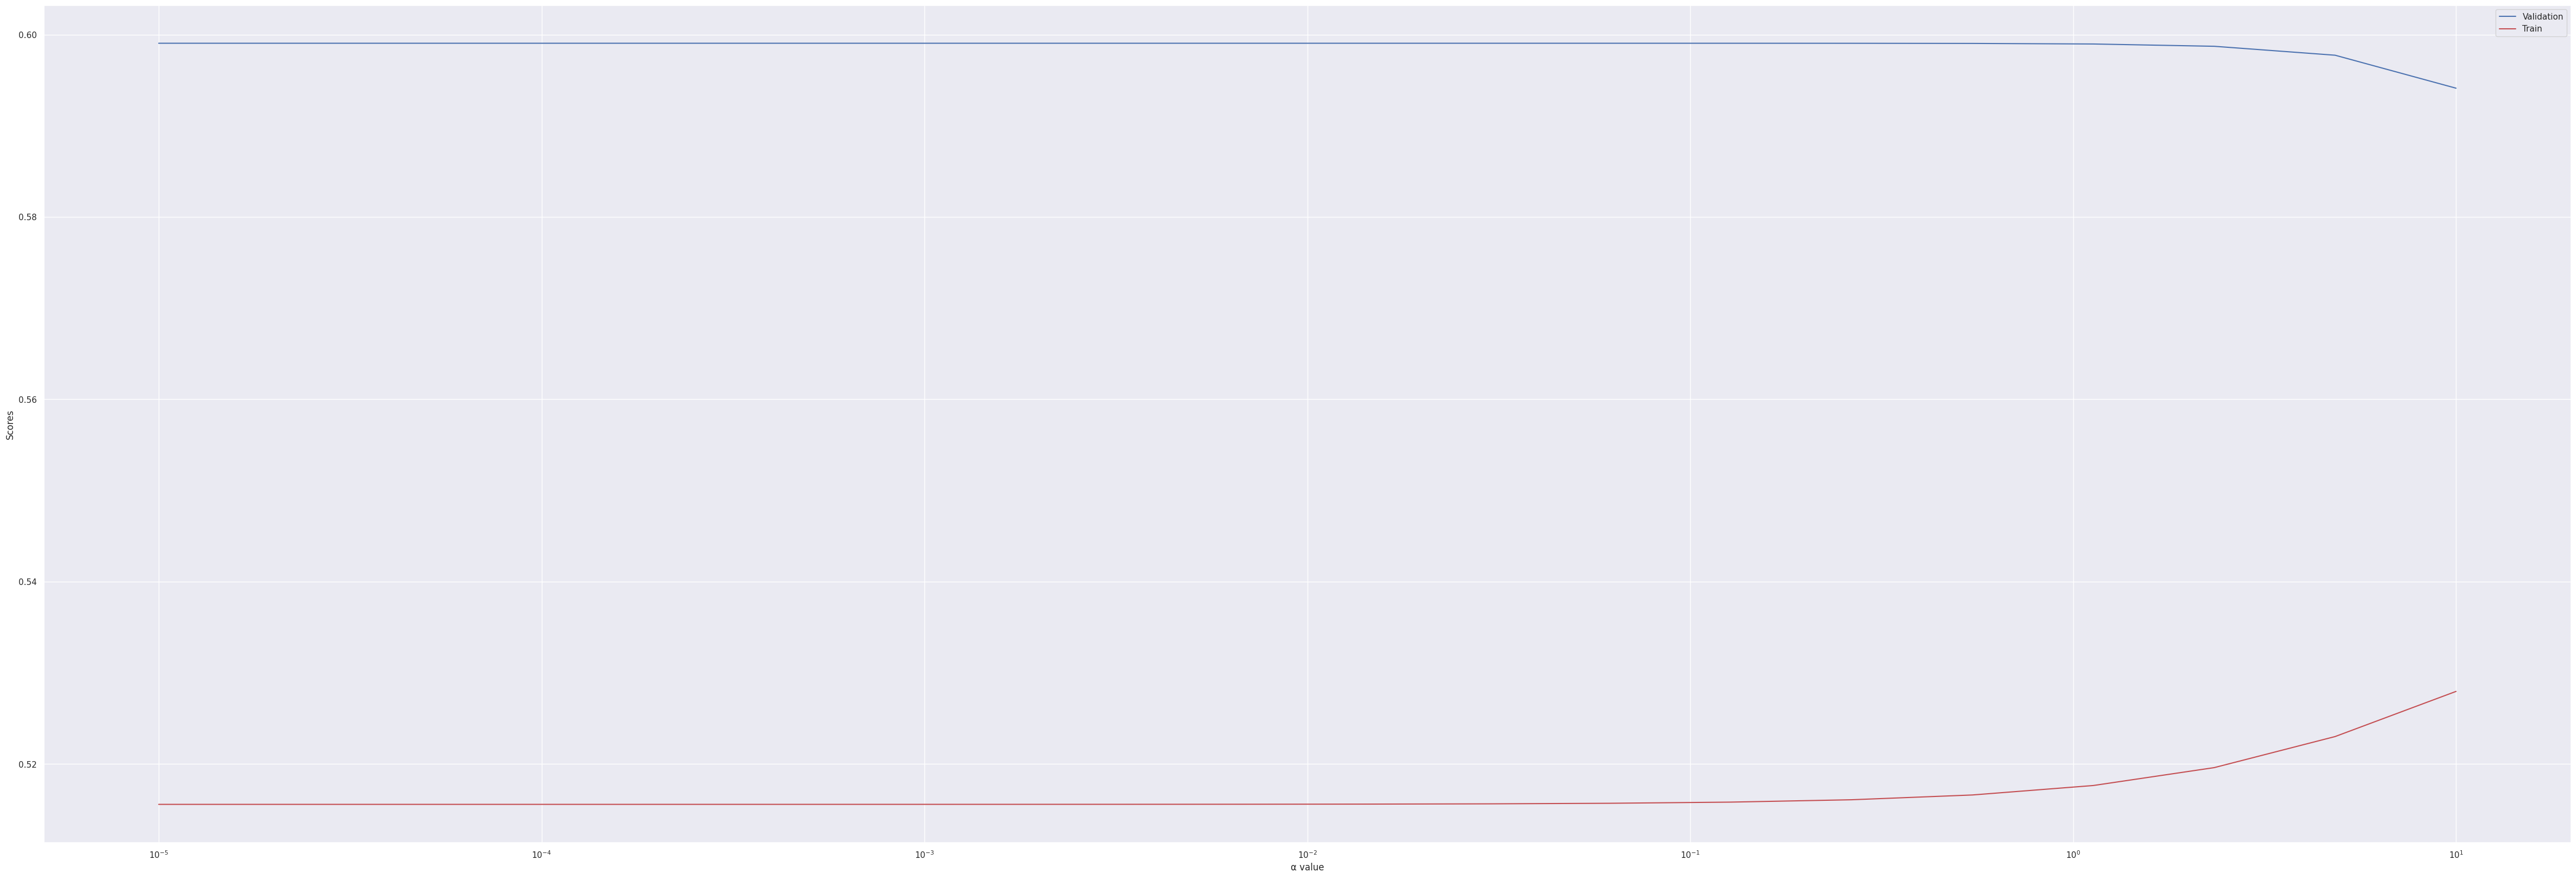

In [1008]:
plt.semilogx(alph_lis,val_scores, label = 'Validation',color = 'b')
plt.semilogx(alph_lis,train_scores, label = 'Train', color = 'r')
plt.legend()
plt.ylabel("Scores")
plt.xlabel("α value")
plt.show()

In [1009]:
xVal = linReg.train(bike_rental_X_train,bike_rental_y_train)
yPredTrain=linReg.predict(bike_rental_X_train)
yPredVal=linReg.predict(bike_rental_X_val)

[[ 1.         -0.71738357  0.31850137 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.          0.64208628 -2.02984515 ...  0.72168784 -0.72901888
  -0.16050272]
 [ 1.         -0.49931006 -0.24617737 ...  0.72168784 -0.72901888
  -0.16050272]
 ...
 [ 1.          0.72560309  1.51657399 ...  0.72168784  1.37170658
  -0.16050272]
 [ 1.         -0.79585596 -1.14937654 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.         -0.51322952  1.30444838 ...  0.72168784  1.37170658
  -0.16050272]]


In [1010]:
bike_rental_X_train

array([[ 1.        , -0.71738357,  0.31850137, ..., -1.38564065,
        -0.72901888, -0.16050272],
       [ 1.        ,  0.64208628, -2.02984515, ...,  0.72168784,
        -0.72901888, -0.16050272],
       [ 1.        , -0.49931006, -0.24617737, ...,  0.72168784,
        -0.72901888, -0.16050272],
       ...,
       [ 1.        ,  0.72560309,  1.51657399, ...,  0.72168784,
         1.37170658, -0.16050272],
       [ 1.        , -0.79585596, -1.14937654, ..., -1.38564065,
        -0.72901888, -0.16050272],
       [ 1.        , -0.51322952,  1.30444838, ...,  0.72168784,
         1.37170658, -0.16050272]])

In [1011]:
### Code here
linReg= LinearRegression()
xVal = linReg.train(bike_rental_X_train,bike_rental_y_train)
yPredTrain=linReg.predict(bike_rental_X_train)
yPredVal=linReg.predict(bike_rental_X_val)
yPredTest=linReg.predict(bike_rental_X_test)

values_train = get_report(yPredTrain,bike_rental_y_train)
values_val = get_report(yPredVal,bike_rental_y_val)
values_test = get_report(yPredTest,bike_rental_y_test)

print("\n           Train")
print(values_train)
print("\n           Validation")
print(values_val)
print("\n           Test")
print(values_test)

[[ 1.         -0.71738357  0.31850137 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.          0.64208628 -2.02984515 ...  0.72168784 -0.72901888
  -0.16050272]
 [ 1.         -0.49931006 -0.24617737 ...  0.72168784 -0.72901888
  -0.16050272]
 ...
 [ 1.          0.72560309  1.51657399 ...  0.72168784  1.37170658
  -0.16050272]
 [ 1.         -0.79585596 -1.14937654 ... -1.38564065 -0.72901888
  -0.16050272]
 [ 1.         -0.51322952  1.30444838 ...  0.72168784  1.37170658
  -0.16050272]]

           Train
           Prediction  Actual
Position                     
1         4791.576092    3068
2         5694.176994    5312
3         3852.246919    2744
436       5909.173409    3907
437       3706.111336    4911
438       3114.119290    2162

           Validation
           Prediction  Actual
Position                     
1         5189.630197    4891
2         4701.305467    3372
3         2910.683158    3830
144       2343.539382    1162
145       2945.793070    2765
146       5649.51

In [1012]:
LinReg = LinearRegression()
LinReg.alpha =1
LinReg.alpha

1

In [1013]:
print(alphas)

[1.00000000e-05 2.06913808e-05 4.28133240e-05 8.85866790e-05
 1.83298071e-04 3.79269019e-04 7.84759970e-04 1.62377674e-03
 3.35981829e-03 6.95192796e-03 1.43844989e-02 2.97635144e-02
 6.15848211e-02 1.27427499e-01 2.63665090e-01 5.45559478e-01
 1.12883789e+00 2.33572147e+00 4.83293024e+00 1.00000000e+01]


**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [1014]:
### Comment here
# As we can see from the plot above the more model complexity decreases the higher
# the R^2 values is for the train set and the lower it is for the rest of the data.

### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [1015]:
loan_data_df = pd.read_csv('loan_data.csv')


In [1016]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])

In [1017]:
loan_data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [1018]:
print(loan_data_df['Gender'].isna().sum())
print(loan_data_df['Married'].isna().sum())
print(loan_data_df['Dependents'].isna().sum())
print(loan_data_df['Education'].isna().sum())
print(loan_data_df['Self_Employed'].isna().sum())
print(loan_data_df['ApplicantIncome'].isna().sum())
print(loan_data_df['CoapplicantIncome'].isna().sum())
print(loan_data_df['LoanAmount'].isna().sum())
print(loan_data_df['Loan_Amount_Term'].isna().sum())
print(loan_data_df['Credit_History'].isna().sum())
print(loan_data_df['Property_Area'].isna().sum())
print(loan_data_df['Loan_Status'].isna().sum())


13
3
15
0
32
0
0
22
14
50
0
0


In [1019]:
#Many of the field in the data contain null values.

In [1020]:
loan_data_df = loan_data_df.fillna(loan_data_df.mean())

<ipython-input-1020-38d0d23535ba>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_data_df = loan_data_df.fillna(loan_data_df.mean())


In [1021]:

loan_data_df = loan_data_df.dropna()

In [1022]:
loan_data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [1023]:
# For the numerical data I placed a mean value in for all the missing data. For the categorical data I removed the missing data from the table

**2.2.3 Encode the categorical variables.**

In [1024]:
loan_data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [1025]:
### Code here

loan_df_encode = pd.get_dummies(loan_data_df,columns = ['Dependents',	'Gender',	'Married',	'Education', 'Self_Employed', 'Property_Area','Loan_Status' ],drop_first = True)

**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [1026]:
### Comment here
loan_data_df["Loan_Status"].value_counts(normalize = True)


Y    0.689531
N    0.310469
Name: Loan_Status, dtype: float64

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

<Axes: >

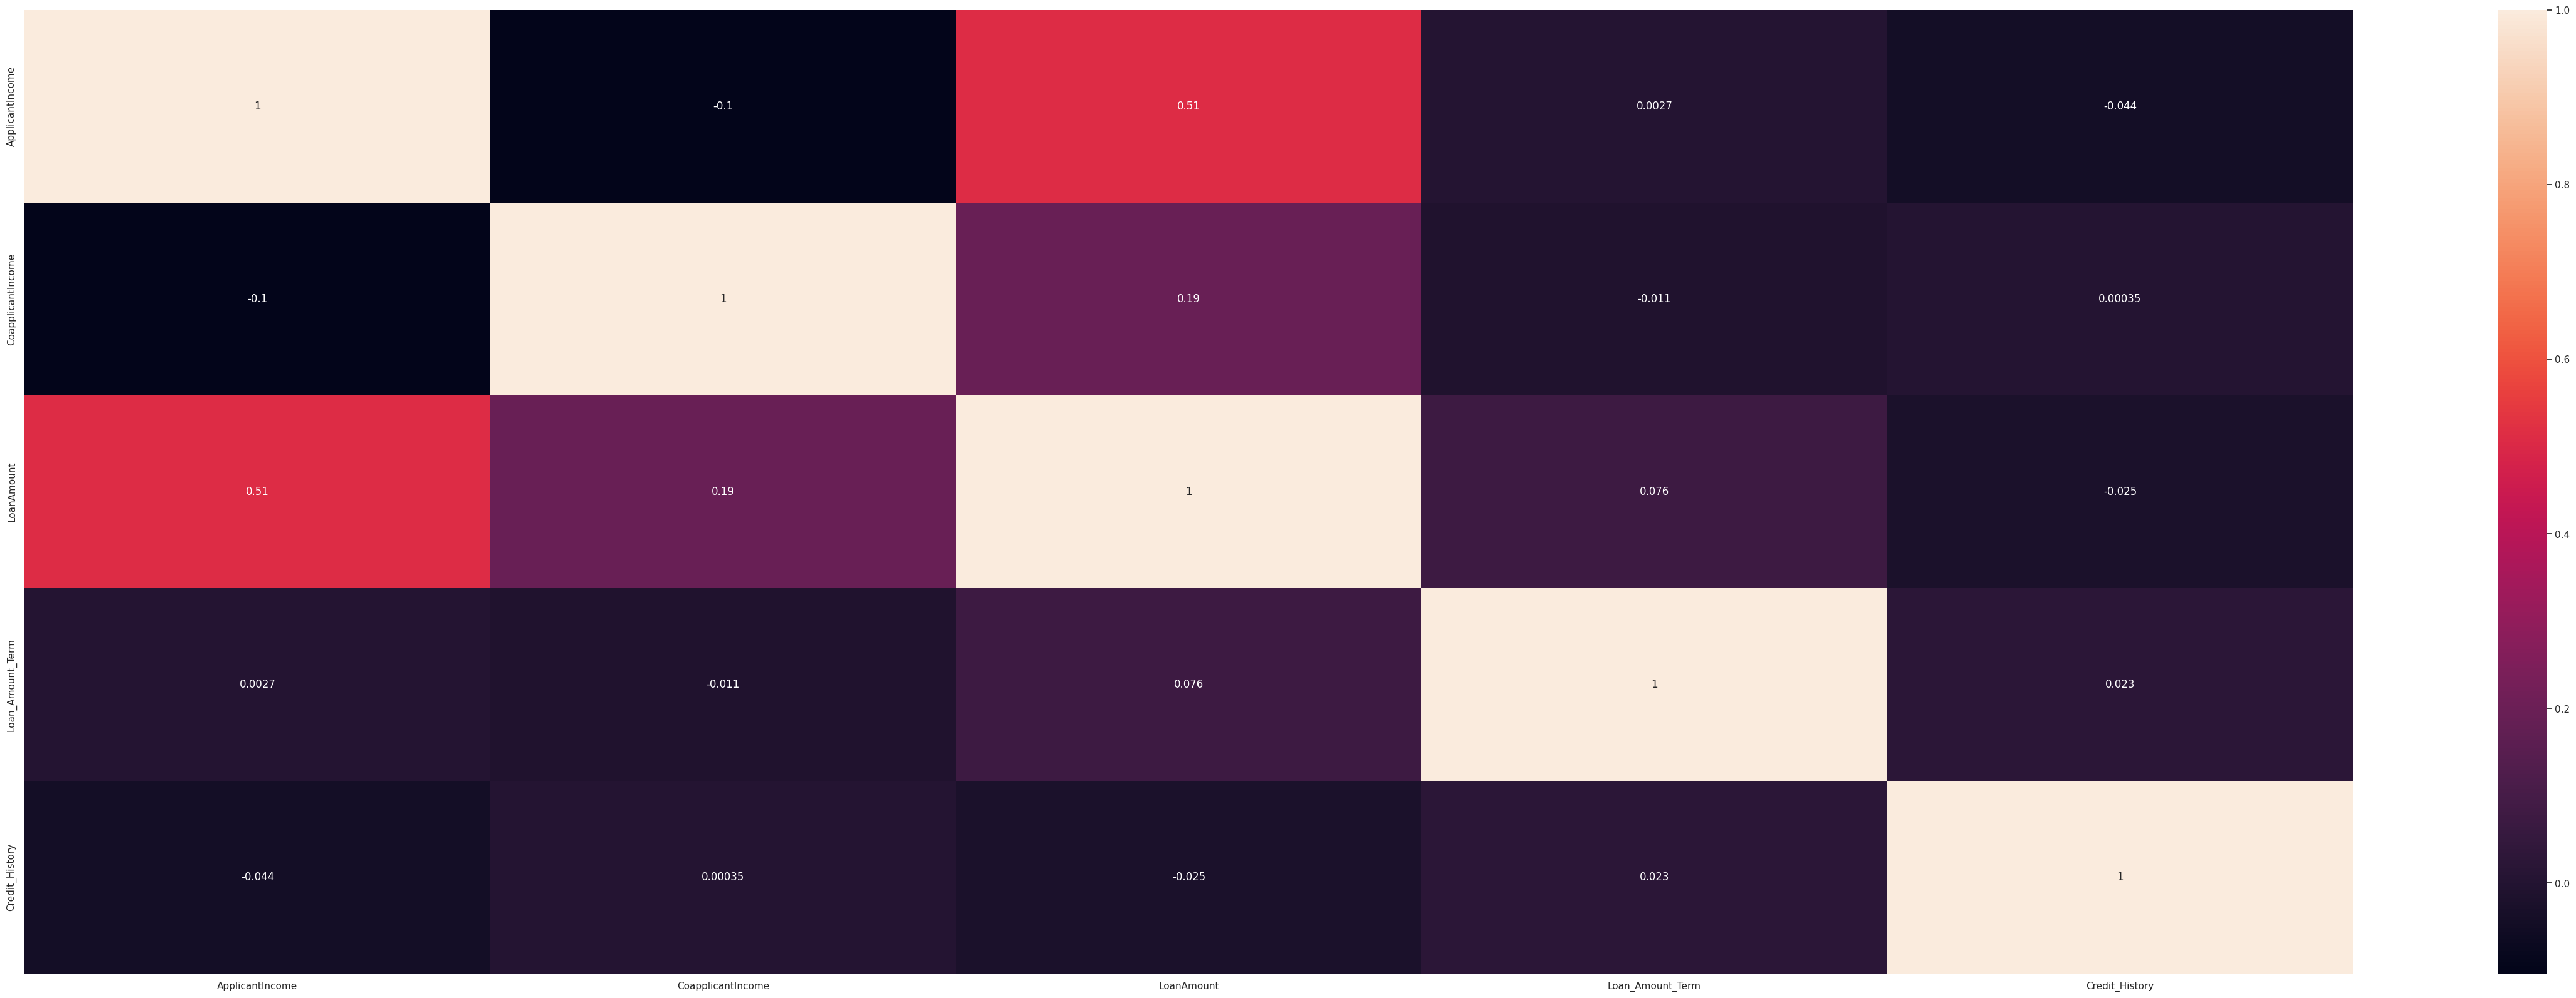

In [1027]:
sns.heatmap(loan_df_encode[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].corr(),annot = True)

**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [1028]:
loan_df_encode.drop(['Loan_Status_Y'], axis=1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,0,0,1,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,0,0,1,1,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,0,0,0,1,1,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,0,0,1,1,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,0,0,1,1,1,0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,0,0,1,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,1,0,0,0,1


In [1029]:
loan_X = loan_df_encode.drop(['Loan_Status_Y'], axis=1)
y  = loan_df_encode[['Loan_Status_Y']]

y_vector = y.to_numpy().reshape(-1,1)

In [1030]:
loan_X_train, x, loan_y_train, y= train_test_split(loan_X,y_vector,test_size = .4, train_size =.6 )
loan_X_val, loan_X_test, loan_y_val, loan_y_test= train_test_split(x,y,test_size = .5)

In [1031]:
Scaler = StandardScaler()
loan_X_train= Scaler.fit_transform(loan_X_train)
loan_X_val = Scaler.fit_transform(loan_X_val)
loan_X_test = Scaler.fit_transform(loan_X_test)

In [1032]:

loan_X_train = np.hstack([np.ones((loan_X_train.shape[0], 1)), loan_X_train])
loan_X_val = np.hstack([np.ones((loan_X_val.shape[0], 1)), loan_X_val])
loan_X_test = np.hstack([np.ones((loan_X_test.shape[0], 1)), loan_X_test])

### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [1033]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

<BarContainer object of 100 artists>

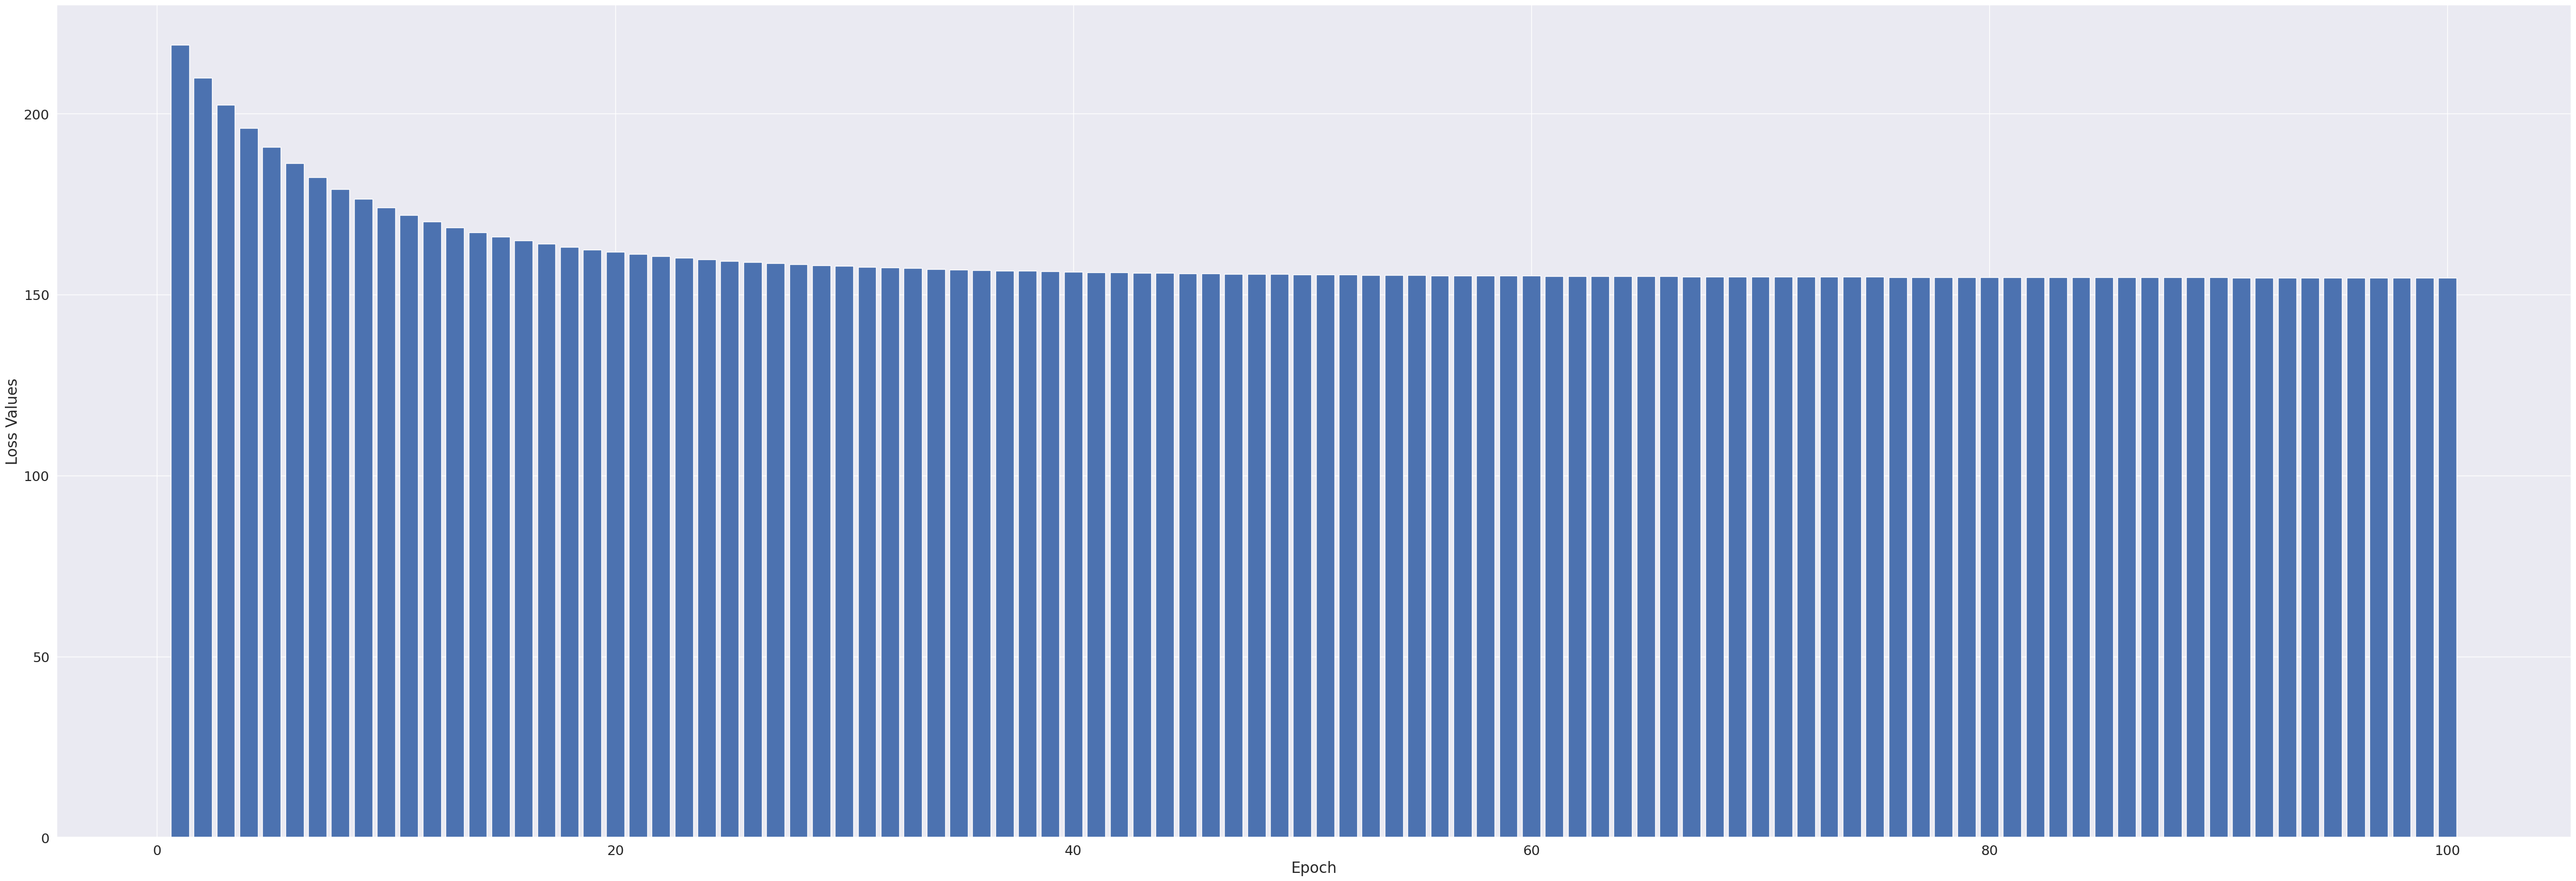

In [1034]:
### Code here
logReg= LogisticRegression()
lossVal = logReg.train(loan_X_train,loan_y_train)
predictTest = LogReg.predict(loan_X_test)
firstAccScore = accuracy_score(loan_y_test,predictTest)
fir_Weight = logReg.w
lossVal = np.array(lossVal).reshape(1,-1)[0]
epochChange =  np.arange(1,101)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel("Epoch", fontsize = 20)
plt.ylabel("Loss Values", fontsize = 20)
plt.bar(epochChange,lossVal)


In [1035]:
accuScore = []
parameterHold = []
wContain = []
for idx in range (20):
  alphaRand = np.random.random(size = 20)
  tRand = np.random.randint(0, 100)
  randEta = np.random.random(size = 20)/1000
  logReg = LogisticRegression(alpha = alphaRand, eta = randEta,  t = tRand)
  logReg.train(loan_X_train,loan_y_train)
  predictTest = LogReg.predict(loan_X_test)
  parameterHold.append([[logReg.alpha],[logReg.eta ],[logReg.t]])
  accuScore.append(accuracy_score(loan_y_test,predictTest))
  wContain.append(logReg.w.reshape(1,-1)[0])

In [1036]:
maxScorePos = 0
maxScore = 0
for i in range(len(accuScore)):
  if maxScore < accuScore[i]:
    maxScore = accuScore[i]
    maxScorePos = i
print(maxScorePos)
print(maxScore)

0
0.7927927927927928


In [1037]:
print("Best score after Hyperparameter search", maxScore)
print("Score without Hyperparameter search", firstAccScore)


Best score after Hyperparameter search 0.7927927927927928
Score without Hyperparameter search 0.7927927927927928


In [1038]:
#My scores with and without hyperparameter search were the same

### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

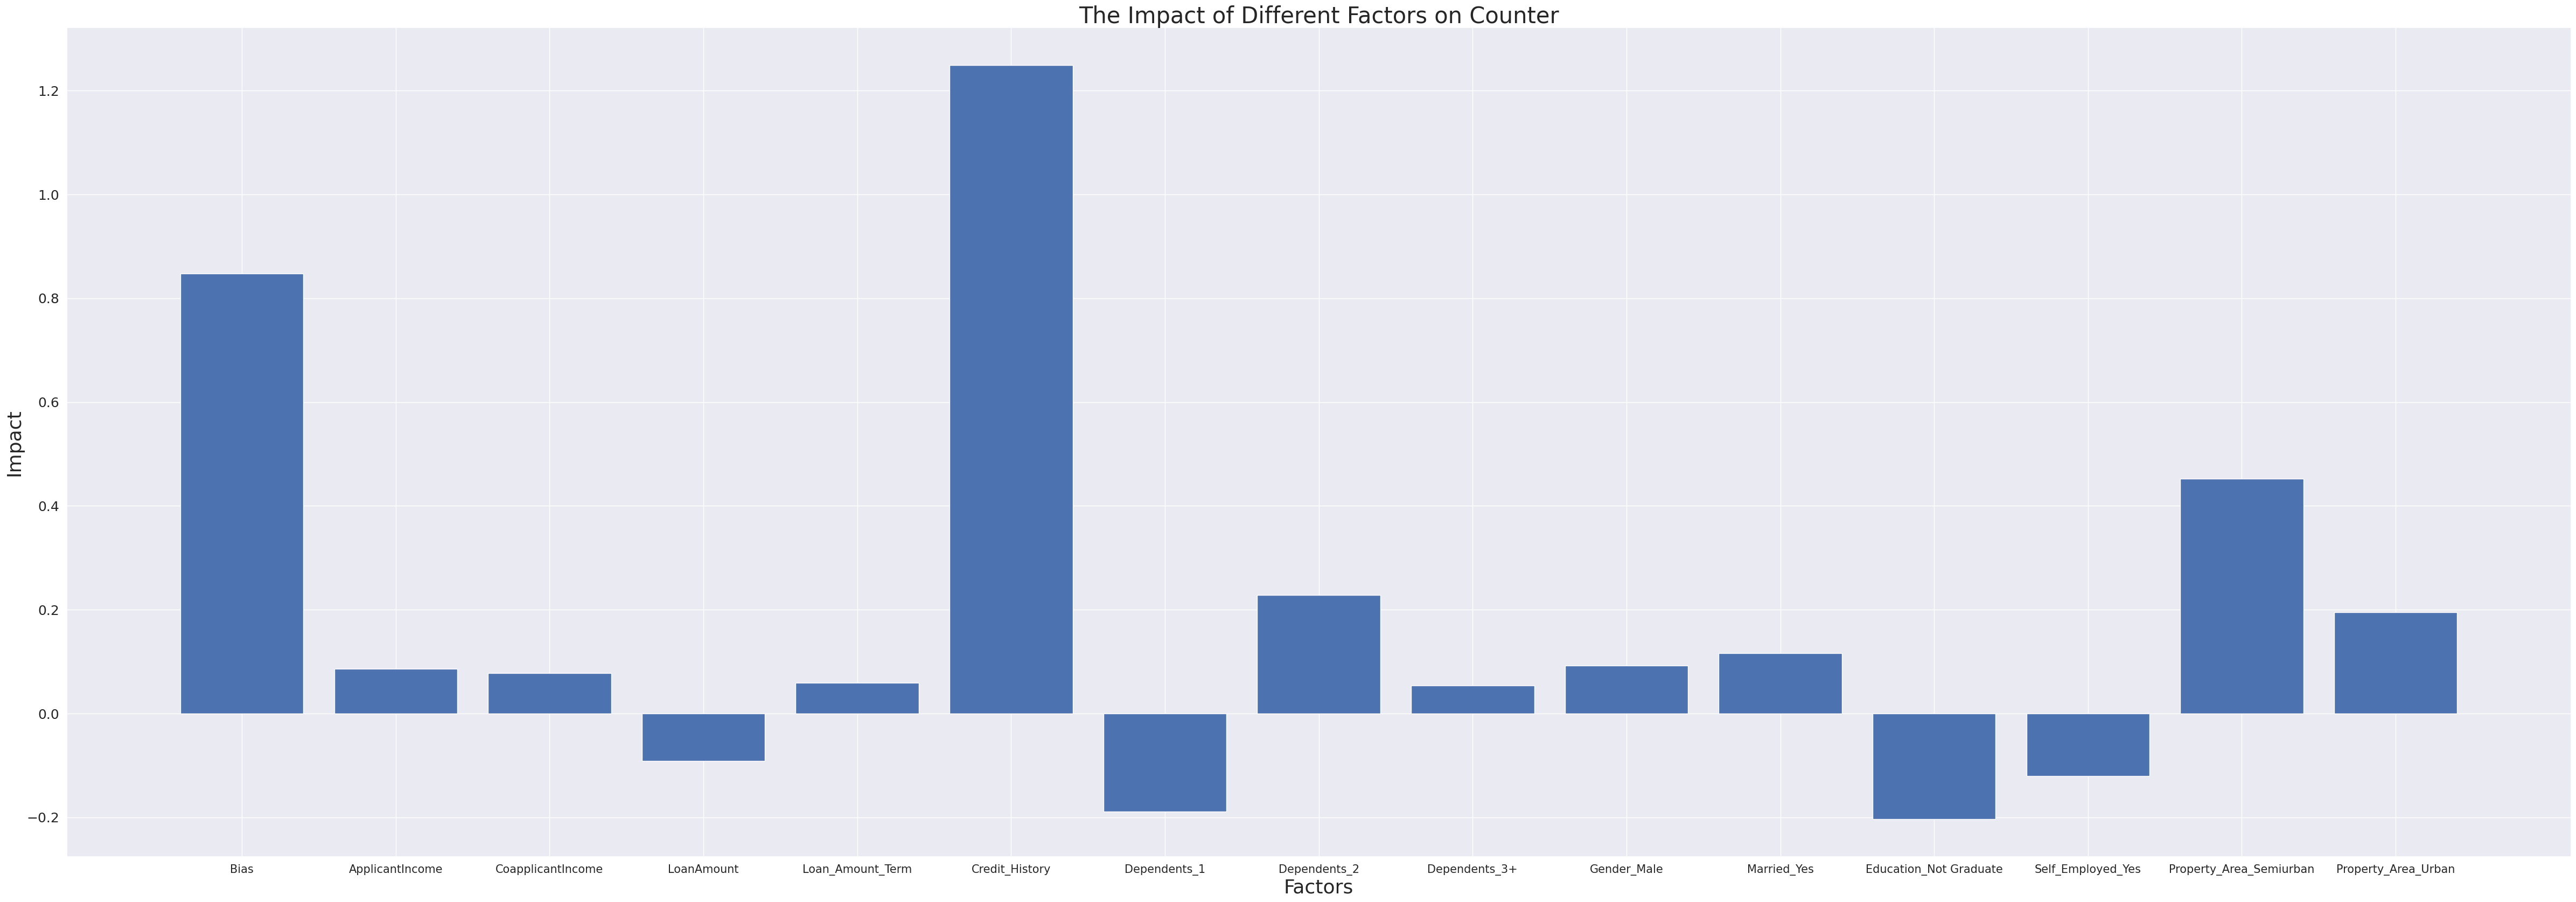

In [1039]:
### Code here
labels = np.append("Bias",loan_X.columns)
plt.xlabel("Factors", fontsize = 26)
plt.ylabel("Impact", fontsize = 26)
plt.title("The Impact of Different Factors on Counter", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 18)
plt.bar(labels,fir_Weight.reshape(1,-1)[0])
plt.show()

In [1040]:
### Comment here
#My model is showing that credit history is the most important factor in the data.


### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [1041]:
### Code here
# Load the dataset
loan_df = pd.read_csv('loan_data.csv')


In [1042]:
feature_names = loan_df.columns.values


In [1043]:
loan_df = loan_df.fillna(loan_data_df.mean())
loan_df = loan_df.dropna()

<ipython-input-1043-c2c50093429a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_df = loan_df.fillna(loan_data_df.mean())


In [1044]:
loan_df = pd.get_dummies(loan_df,columns = ['Loan_Status','Dependents',	'Gender',	'Married',	'Education', 'Self_Employed', 'Property_Area'],drop_first = True)

In [1045]:
loan_df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Y,Dependents_1,Dependents_2,Dependents_3+,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,144.969009,360.0,1.0,1,0,0,0,1,0,0,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,1,0,0,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,1,0,0,0,1,1,0,1,0,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,1,1,1,0,0,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.000000,360.0,1.0,1,0,0,0,0,0,0,0,0,0
610,LP002979,4106,0.0,40.000000,180.0,1.0,1,0,0,1,1,1,0,0,0,0
611,LP002983,8072,240.0,253.000000,360.0,1.0,1,1,0,0,1,1,0,0,0,1
612,LP002984,7583,0.0,187.000000,360.0,1.0,1,0,1,0,1,1,0,0,0,1


In [1046]:
target = loan_df['Loan_Status_Y']
loan_df = loan_df.drop('Loan_Status_Y', axis = 1)
loan_df = loan_df.drop('Loan_ID', axis = 1)

In [1047]:
loan_X_train, x, loan_y_train, y= train_test_split(loan_df,target,test_size = .4, train_size =.6)
loan_X_val, loan_X_test, loan_y_val, loan_y_test= train_test_split(x,y,test_size = .5, train_size =.5 )


In [1048]:
Scaler = StandardScaler()
loan_X_train = Scaler.fit_transform(loan_X_train)
loan_X_test = Scaler.fit_transform(loan_X_test)
loan_X_val = Scaler.fit_transform(loan_X_val)

modeler= LinearSVC(dual=False)
modeler.fit(loan_X_train,loan_y_train)

trainPred = modeler.predict(loan_X_train)
valPred = modeler.predict(loan_X_val)
testPred = modeler.predict(loan_X_test)


In [1049]:
print(accuracy_score(trainPred,loan_y_train))
print(accuracy_score(valPred,loan_y_val))
print(accuracy_score(testPred,loan_y_test))

0.8192771084337349
0.7927927927927928
0.8108108108108109


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [1050]:
### Code here
dev_X= Scaler.fit_transform(dev_X)
test_X = Scaler.fit_transform(test_X)
modeler= LinearSVC(dual=True)
modeler.fit(loan_X_train,loan_y_train)

trainPred = modeler.predict(loan_X_train)
valPred = modeler.predict(loan_X_val)
testPred = modeler.predict(loan_X_test)
print(accuracy_score(trainPred,loan_y_train))
print(accuracy_score(valPred,loan_y_val))
print(accuracy_score(testPred,loan_y_test))

0.8192771084337349
0.7927927927927928
0.8108108108108109


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
